<a href="https://colab.research.google.com/github/juliterminiello/trabajo_Flacso/blob/main/trabajo_jterminiello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/juliterminiello/trabajo_Flacso/main/baseHISTORICA.csv", sep=";")

In [ ]:
df.head()

,año,apellido,nombre,edad,género,municipio,circunstancia,mecanismo,institucion,actividad,servicio,DJ
0,2016,Panigua,Esteban,17.0,Varón,Lomas de Zamora,Robo de bienes propios,Arma de fuego reglamentaria,Policía Federal Argentina,Sí,No,Lomas de Zamora
1,2016,Baez,Rosa Hilda,NaN,Mujer,Quilmes,Robo de bienes de terceros,Arma de fuego reglamentaria,Policía Bonaerense,Sí,Sí,Quilmes
2,2016,Valdez,Sergio Alejandro,20.0,Varón,Ituzaingó,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,Morón
3,2016,Alvarez,Ezequiel Alberto,17.0,Varón,La Plata,Robo de bienes propios,Arma de fuego reglamentaria,Policía Bonaerense,Sí,No,La Plata
4,2016,Ibarra,Walter Oscar,49.0,Varón,La Plata,Femicidio vinculado,Arma de fuego reglamentaria,Policía Bonaerense,Sí,No,La Plata


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   año            844 non-null    int64  
 1   apellido       763 non-null    object 
 2   nombre         767 non-null    object 
 3   edad           706 non-null    float64
 4   género         844 non-null    object 
 5   municipio      843 non-null    object 
 6   circunstancia  844 non-null    object 
 7   mecanismo      844 non-null    object 
 8   institucion    844 non-null    object 
 9   actividad      844 non-null    object 
 10  servicio       763 non-null    object 
 11  DJ             844 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 79.2+ KB


In [ ]:
df.columns

Index(['año', 'apellido', 'nombre', 'edad', 'género', 'municipio',
       'circunstancia', 'mecanismo', 'institucion', 'actividad', 'servicio',
       'DJ'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=844, step=1)

In [ ]:
df.nunique()

año                7
apellido         508
nombre           661
edad              59
género             3
municipio         64
circunstancia     11
mecanismo          6
institucion        8
actividad          3
servicio           3
DJ                20
dtype: int64

In [ ]:
df.isna().sum()

año                0
apellido          81
nombre            77
edad             138
género             0
municipio          1
circunstancia      0
mecanismo          0
institucion        0
actividad          0
servicio          81
DJ                 0
dtype: int64

In [ ]:
#Buscar el sin dato de Municipio
df.loc[df['municipio'].isna()]

,año,apellido,nombre,edad,género,municipio,circunstancia,mecanismo,institucion,actividad,servicio,DJ
815,2022,Juárez,Ángel Agustín,19.0,Varón,NaN,Accidente de tránsito con patrullero,Patrullero,Policía Bonaerense,Sí,Sí,Quilmes


In [ ]:
#Se reemplaza el sin dato por Quilmes, porque se infiere del Departamento Judicial.
municipio_replacements = {
    815: 'Quilmes',
}

In [ ]:
municipio_replacements

{815: 'Quilmes'}

In [ ]:
df = df.drop(['apellido', 'nombre'], axis=1)

In [ ]:
df.columns

Index(['año', 'edad', 'género', 'municipio', 'circunstancia', 'mecanismo',
       'institucion', 'actividad', 'servicio', 'DJ'],
      dtype='object')

<Axes: >

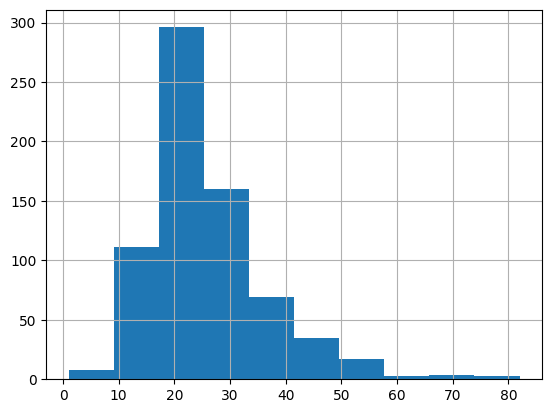

In [ ]:
df["edad"].hist()

In [ ]:
print("Media: {}".format(df['edad'].mean()))
print("Mediana: {}".format(df['edad'].median()))
print("Moda: {}".format(df['edad'].mode()))

Media: 26.19830028328612
Mediana: 24.0
Moda: 0    18.0
Name: edad, dtype: float64


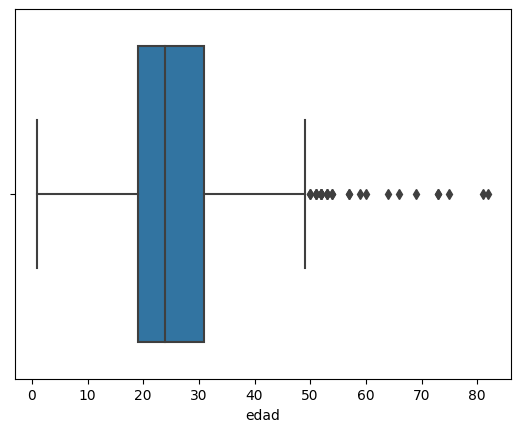

In [ ]:
sns.boxplot(x=df['edad']);

In [ ]:
#Se reemplaza los datos nan por la mediana. Para poder usar este dato numérico en el análisis.
df["edad"].fillna(df["edad"].median(), inplace=True);

In [ ]:
df.head(2)

,año,edad,género,municipio,circunstancia,mecanismo,institucion,actividad,servicio,DJ
0,2016,17.0,Varón,Lomas de Zamora,Robo de bienes propios,Arma de fuego reglamentaria,Policía Federal Argentina,Sí,No,Lomas de Zamora
1,2016,24.0,Mujer,Quilmes,Robo de bienes de terceros,Arma de fuego reglamentaria,Policía Bonaerense,Sí,Sí,Quilmes


In [ ]:
#Se crea columna de edad con número entero
df["edad_entero"] = df["edad"].round().astype(int)
print(df["edad_entero"])

0      17
1      24
2      20
3      17
4      49
       ..
839    24
840    19
841    20
842    25
843    26
Name: edad_entero, Length: 844, dtype: int64


In [ ]:
df.head(2)

,año,edad,género,municipio,circunstancia,mecanismo,institucion,actividad,servicio,DJ,edad_entero
0,2016,17.0,Varón,Lomas de Zamora,Robo de bienes propios,Arma de fuego reglamentaria,Policía Federal Argentina,Sí,No,Lomas de Zamora,17
1,2016,24.0,Mujer,Quilmes,Robo de bienes de terceros,Arma de fuego reglamentaria,Policía Bonaerense,Sí,Sí,Quilmes,24


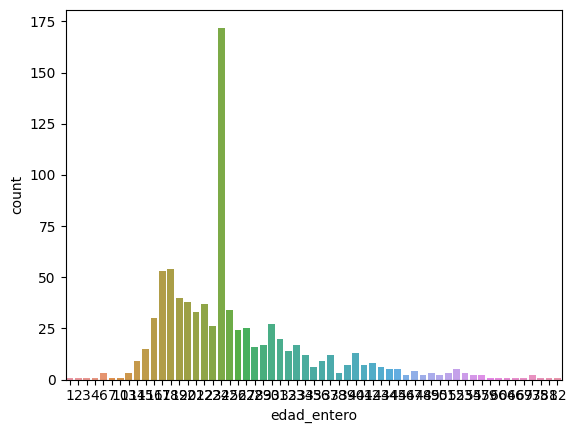

In [ ]:
sns.countplot(x=df['edad_entero']);

In [ ]:
pd.crosstab(df["circunstancia"], df["género"])

género,Mujer,Trans mujer,Varón
circunstancia,,,
Accidente de tránsito con patrullero,4,0,18
Circunstancia de carácter privado,8,0,47
Femicidio,29,1,0
Femicidio vinculado,0,0,7
Orden de allanamiento y/o detención,2,0,11
Otra circunstancia de intervención policial,2,0,41
Persecución,6,0,89
Riesgo de vida de terceros,0,0,7
Robo de bienes de terceros,3,0,107


In [ ]:
pd.crosstab(df["circunstancia"], df["mecanismo"])

mecanismo,Arma de fuego no reglamentaria,Arma de fuego reglamentaria,Fuerza física,Otro mecanismo,Patrullero,Sin dato
circunstancia,,,,,,
Accidente de tránsito con patrullero,0,0,0,0,22,0
Circunstancia de carácter privado,2,49,3,0,0,1
Femicidio,2,24,0,3,0,1
Femicidio vinculado,0,7,0,0,0,0
Orden de allanamiento y/o detención,0,12,1,0,0,0
Otra circunstancia de intervención policial,0,35,4,1,1,2
Persecución,0,57,0,24,14,0
Riesgo de vida de terceros,0,7,0,0,0,0
Robo de bienes de terceros,8,102,0,0,0,0


In [ ]:
pd.crosstab(df["circunstancia"], df["servicio"])

servicio,No,Sin dato,Sí
circunstancia,,,
Accidente de tránsito con patrullero,0,0,22
Circunstancia de carácter privado,49,1,2
Femicidio,25,0,0
Femicidio vinculado,7,0,0
Orden de allanamiento y/o detención,0,0,13
Otra circunstancia de intervención policial,6,0,37
Persecución,2,3,90
Riesgo de vida de terceros,4,0,3
Robo de bienes de terceros,58,1,41


In [ ]:
pd.crosstab(df["año"], df["circunstancia"])

circunstancia,Accidente de tránsito con patrullero,Circunstancia de carácter privado,Femicidio,Femicidio vinculado,Orden de allanamiento y/o detención,Otra circunstancia de intervención policial,Persecución,Riesgo de vida de terceros,Robo de bienes de terceros,Robo de bienes propios,Sin dato
año,,,,,,,,,,,
2016,4,5,2,1,5,6,14,0,17,52,4
2017,4,12,6,0,2,2,14,2,12,65,4
2018,1,7,5,0,0,5,9,2,29,62,0
2019,4,10,7,0,1,7,15,0,17,60,21
2020,2,7,1,2,1,9,12,2,15,68,9
2021,3,8,7,3,3,9,16,1,13,59,8
2022,4,6,2,1,1,5,15,0,7,45,5


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [ ]:
colors = sns.color_palette('colorblind')

df_graph = df['género'].value_counts().reset_index()

fig = px.pie(df_graph, values='género', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
df_graph = df['servicio'].value_counts().reset_index()

fig = px.pie(df_graph, values='servicio', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
#Se chequea los datos Sin dato de la situación de Servicio
df.loc[df['servicio'].isna()]

,año,edad,género,municipio,circunstancia,mecanismo,institucion,actividad,servicio,DJ,edad_entero
2,2016,20.0,Varón,Ituzaingó,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,Morón,20
43,2016,24.0,Varón,Tres de Febrero,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Federal Argentina,No,NaN,San Martín,24
62,2016,25.0,Varón,Lanús,Robo de bienes propios,Arma de fuego reglamentaria,Policía Federal Argentina,No,NaN,Lomas de Zamora,25
111,2017,24.0,Varón,Ituzaingó,Robo de bienes propios,Arma de fuego no reglamentaria,Gendarmería Nacional,No,NaN,Morón,24
134,2017,26.0,Varón,La Plata,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,La Plata,26
...,...,...,...,...,...,...,...,...,...,...,...
778,2022,19.0,Varón,La Matanza,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,La Matanza,19
779,2022,32.0,Varón,La Matanza,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,La Matanza,32
780,2022,20.0,Varón,Avellaneda,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Federal Argentina,No,NaN,Avellaneda-Lanús,20
787,2022,47.0,Varón,San Isidro,Sin dato,Sin dato,Sin dato,Sin dato,NaN,San Isidro,47


In [ ]:
#Si el/la policía no se encuentra en actividad, está bien que no tenga dato en servicio. ¿Cómo se cambiarían esos datos? VER.
df.loc[(df['actividad']=='No') & (df['servicio'].isna())]

,año,edad,género,municipio,circunstancia,mecanismo,institucion,actividad,servicio,DJ,edad_entero
2,2016,20.0,Varón,Ituzaingó,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,Morón,20
43,2016,24.0,Varón,Tres de Febrero,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Federal Argentina,No,NaN,San Martín,24
62,2016,25.0,Varón,Lanús,Robo de bienes propios,Arma de fuego reglamentaria,Policía Federal Argentina,No,NaN,Lomas de Zamora,25
111,2017,24.0,Varón,Ituzaingó,Robo de bienes propios,Arma de fuego no reglamentaria,Gendarmería Nacional,No,NaN,Morón,24
134,2017,26.0,Varón,La Plata,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,La Plata,26
135,2017,17.0,Varón,La Plata,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,La Plata,17
137,2017,26.0,Mujer,Morón,Femicidio,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,Sin dato,26
155,2017,18.0,Varón,Moreno,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Federal Argentina,No,NaN,Moreno-Gral. Rodríguez,18
174,2017,18.0,Varón,Morón,Robo de bienes propios,Arma de fuego no reglamentaria,Policía Bonaerense,No,NaN,Morón,18
193,2017,32.0,Varón,Quilmes,Robo de bienes propios,Arma de fuego no reglamentaria,Gendarmería Nacional,No,NaN,Quilmes,32


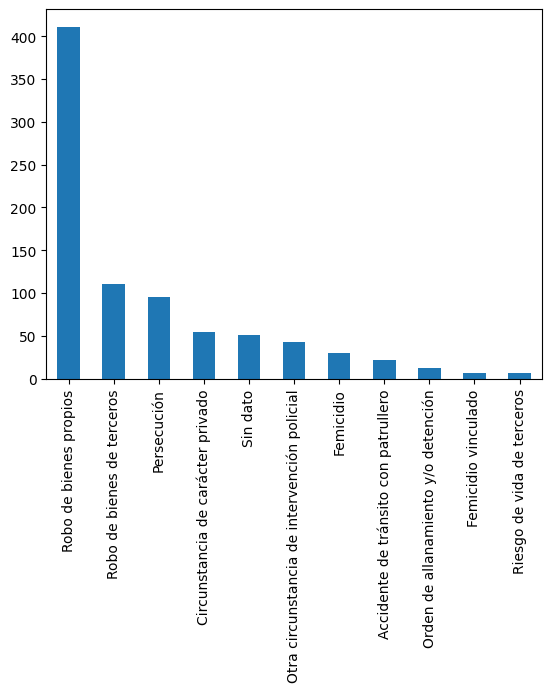

In [ ]:
circunstancia = df['circunstancia'].value_counts()
circunstancia.plot.bar();

In [ ]:
df.groupby(['circunstancia','género']).mean()

<ipython-input-32-0d1353d2d554>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



año  \
circunstancia                               género                     
Accidente de tránsito con patrullero        Mujer        2018.250000   
                                            Varón        2019.111111   
Circunstancia de carácter privado           Mujer        2019.375000   
                                            Varón        2018.829787   
Femicidio                                   Mujer        2018.862069   
                                            Trans mujer  2021.000000   
Femicidio vinculado                         Varón        2020.142857   
Orden de allanamiento y/o detención         Mujer        2020.000000   
                                            Varón        2018.000000   
Otra circunstancia de intervención policial Mujer        2019.500000   
                                            Varón        2019.341463   
Persecución                                 Mujer        2018.833333   
                                            Varón        2019.123596   
Riesgo de vida de terceros                  Varón        2018.714286   
Robo de bienes de terceros                  Mujer        2017.666667   
                                            Varón        2018.644860   
Robo de bienes propios                      Mujer        2019.666667   
                                            Varón        2018.928922   
Sin dato                                    Mujer        2016.333333   
                                            Varón        2019.583333   

                                                              edad  \
circunstancia                               género                   
Accidente de tránsito con patrullero        Mujer        48.250000   
                                            Varón        30.888889   
Circunstancia de carácter privado           Mujer        21.500000   
                                            Varón        31.702128   
Femicidio                                   Mujer        28.482759   
                                            Trans mujer  24.000000   
Femicidio vinculado                         Varón        29.714286   
Orden de allanamiento y/o detención         Mujer        44.500000   
                                            Varón        29.272727   
Otra circunstancia de intervención policial Mujer        30.000000   
                                            Varón        28.682927   
Persecución                                 Mujer        19.166667   
                                            Varón        26.314607   
Riesgo de vida de terceros                  Varón        32.857143   
Robo de bienes de terceros                  Mujer        28.666667   
                                            Varón        26.822430   
Robo de bienes propios                      Mujer        30.666667   
                                            Varón        23.272059   
Sin dato                                    Mujer        25.666667   
                                            Varón        28.854167   

                                                         edad_entero  
circunstancia                               género                    
Accidente de tránsito con patrullero        Mujer          48.250000  
                                            Varón          30.888889  
Circunstancia de carácter privado           Mujer          21.500000  
                                            Varón          31.702128  
Femicidio                                   Mujer          28.482759  
                                            Trans mujer    24.000000  
Femicidio vinculado                         Varón          29.714286  
Orden de allanamiento y/o detención         Mujer          44.500000  
                                            Varón          29.272727  
Otra circunstancia de intervención policial Mujer          30.000000  
                                            Varón          28.682927  
Persecución     

In [ ]:
df.groupby(['circunstancia']).agg(
    **{
        'Edad Promedio': ('edad_entero', 'mean'),
        'Edad Maxima': ('edad_entero', 'max'),
    }).reset_index()

,circunstancia,Edad Promedio,Edad Maxima
0,Accidente de tránsito con patrullero,34.045455,82
1,Circunstancia de carácter privado,30.218182,81
2,Femicidio,28.333333,51
3,Femicidio vinculado,29.714286,49
4,Orden de allanamiento y/o detención,31.615385,60
5,Otra circunstancia de intervención policial,28.744186,52
6,Persecución,25.863158,66
7,Riesgo de vida de terceros,32.857143,53
8,Robo de bienes de terceros,26.872727,64
9,Robo de bienes propios,23.326034,49


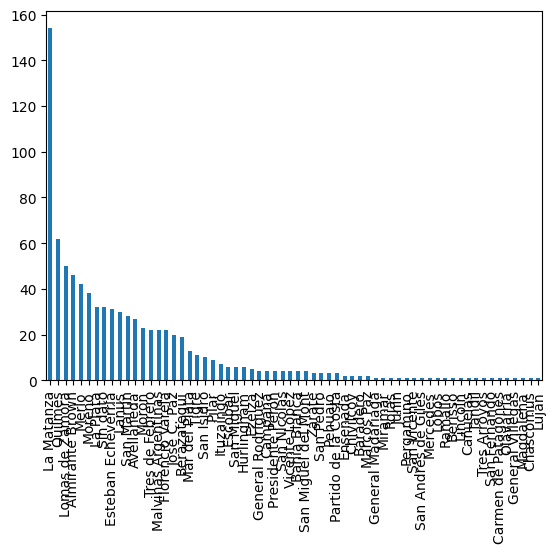

In [ ]:
municipio = df['municipio'].value_counts()
municipio.plot.bar();

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
gdf_municipio = gpd.read_file('https://github.com/matog/Flacso_ciencia_de_datos_python_2023/raw/main/Clase4/data/departamento.zip')
gdf_prov = gpd.read_file('https://github.com/matog/Flacso_ciencia_de_datos_python_2023/raw/main/Clase4/data/provincia.zip')

In [ ]:
gdf_municipio

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,2,Departamento,Departamento Federal,Departamento,Federal,30035,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57731 -30.69016, -58.57512..."
1,3,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,30056,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.13011 -33.02912, -58.13087..."
2,4,Departamento,Departamento Islas del Ibicuy,Departamento,Islas del Ibicuy,30063,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57589 -34.02675, -58.57593..."
3,5,Departamento,Departamento Victoria,Departamento,Victoria,30105,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-59.77158 -32.58791, -59.77198..."
4,6,Departamento,Departamento Diamante,Departamento,Diamante,30021,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-60.25784 -32.05170, -60.25723..."
...,...,...,...,...,...,...,...,...,...
524,502,Departamento,Departamento Iglesia,Departamento,Iglesia,70049,Direc. de Catastro,IGN,"MULTIPOLYGON (((-69.62981 -28.39369, -69.62956..."
525,503,Departamento,Departamento Jáchal,Departamento,Jáchal,70056,Direc. de Catastro,IGN,"MULTIPOLYGON (((-68.25879 -29.74673, -68.26262..."
526,504,Departamento,Departamento Valle Fértil,Departamento,Valle Fértil,70119,Direc. de Catastro,IGN,"MULTIPOLYGON (((-67.99199 -29.97924, -67.99151..."
527,505,Departamento,Partido de La Plata,Partido,La Plata,06441,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-57.99667 -34.87535, -57.99087..."


In [ ]:
gdf_prov

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."
5,6,0.0,Provincia,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,"MULTIPOLYGON (((-66.09976 -26.22049, -66.10088..."
6,7,0.0,Provincia,Provincia de Tucumán,Provincia,Tucumán,90,Geografía,IGN,"MULTIPOLYGON (((-64.49532 -26.21937, -64.49723..."
7,8,0.0,Provincia,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37764..."
8,9,0.0,Provincia,Provincia de Formosa,Provincia,Formosa,34,Geografía,IGN,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37935..."
9,10,0.0,Provincia,Provincia de Santa Cruz,Provincia,Santa Cruz,78,Geografía,IGN,"MULTIPOLYGON (((-71.54709 -45.99975, -71.54573..."


In [ ]:
gdf_prov.loc[gdf_prov['nam'] == 'Buenos Aires'].is_valid

23    True
dtype: bool

In [ ]:
gdf_BA = gdf_municipio.loc[gdf_municipio['fdc'] == 'ARBA - Gerencia de Servicios Catastrales']

<Figure size 10000x5000 with 0 Axes>

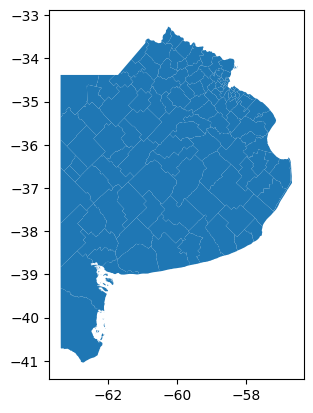

In [ ]:
plt.figure(figsize=(100,50))
gdf_BA.plot();

In [ ]:
#Sumo una tabla de datos que se comparten con la base
dfmuni = pd.read_csv('https://raw.githubusercontent.com/juliterminiello/trabajo_Flacso/main/municipios%20totales.csv', sep=";")

In [ ]:
dfmuni

,Municipio donde se produjo la muerte,Casos_totales
0,Almirante Brown,46
1,Avellaneda,27
2,Bahía Blanca,4
3,Baradero,2
4,Berazategui,19
...,...,...
58,Tigre,11
59,Tres Arroyos,1
60,Tres de Febrero,22
61,Vicente López,4


In [ ]:
dfmuni.rename(columns = {
                      'Municipio donde se produjo la muerte': 'municipio_muerte'},
                inplace = True)

In [ ]:
dfmuni.columns

Index(['municipio_muerte', 'Casos_totales'], dtype='object')

In [ ]:
gdf_BA = pd.merge(gdf_BA,
               dfmuni,
               left_on = 'nam',
               right_on = 'municipio_muerte',
               how= 'left')

In [ ]:
gdf_BA

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,municipio_muerte,Casos_totales
0,9,Departamento,Partido de Saladillo,Partido,Saladillo,06707,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-59.18145 -35.75551, -59.18139...",NaN,NaN
1,10,Departamento,Partido de Las Flores,Partido,Las Flores,06455,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.70753 -36.01728, -58.70772...",NaN,NaN
2,11,Departamento,Partido de Rojas,Partido,Rojas,06686,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-60.49639 -34.17646, -60.49634...",Rojas,1.0
3,12,Departamento,Partido de Escobar,Partido,Escobar,06252,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.71215 -34.24890, -58.69112...",Escobar,6.0
4,13,Departamento,Partido de José C. Paz,Partido,José C. Paz,06412,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.78454 -34.47607, -58.78316...",José C. Paz,20.0
...,...,...,...,...,...,...,...,...,...,...,...
130,474,Departamento,Partido de Lanús,Partido,Lanús,06434,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.40254 -34.65999, -58.40265...",Lanús,30.0
131,475,Departamento,Partido de Lomas de Zamora,Partido,Lomas de Zamora,06490,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.43444 -34.70519, -58.43264...",Lomas de Zamora,50.0
132,476,Departamento,Partido de Avellaneda,Partido,Avellaneda,06035,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.27964 -34.67864, -58.28336...",Avellaneda,27.0
133,512,Departamento,Partido de San Fernando,Partido,San Fernando,06749,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.57862 -34.02716, -58.57593...",San Fernando,1.0


In [ ]:
gdf_BA.loc[gdf_BA['municipio_muerte'].isna()]

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,municipio_muerte,Casos_totales
0,9,Departamento,Partido de Saladillo,Partido,Saladillo,06707,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-59.18145 -35.75551, -59.18139...",NaN,NaN
1,10,Departamento,Partido de Las Flores,Partido,Las Flores,06455,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.70753 -36.01728, -58.70772...",NaN,NaN
5,14,Departamento,Partido de San Antonio de Areco,Partido,San Antonio de Areco,06735,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-59.31234 -34.16104, -59.31240...",NaN,NaN
6,15,Departamento,Partido de Maipú,Partido,Maipú,06511,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-57.32878 -36.66916, -57.32268...",NaN,NaN
7,302,Departamento,Partido de Tapalqué,Partido,Tapalqué,06798,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-59.55321 -36.00679, -59.55298...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122,362,Departamento,Partido de Leandro N. Alem,Partido,Leandro N. Alem,06462,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-61.32917 -34.45315, -61.33481...",NaN,NaN
123,365,Departamento,Partido de General Arenales,Partido,General Arenales,06294,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-61.12208 -34.07195, -61.11984...",NaN,NaN
124,368,Departamento,Partido de Rivadavia,Partido,Rivadavia,06679,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-62.89956 -35.25928, -62.89954...",NaN,NaN
126,377,Departamento,Partido de Coronel de Marina Leonardo Rosales,Partido,Coronel de Marina Leonardo Rosales,06182,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-61.72850 -38.65709, -61.72863...",NaN,NaN


In [ ]:
#Se reemplaza NaN por 0, porque no hay casos registrados en dichos municipios
gdf_BA["Casos_totales"].fillna(0, inplace=True);

In [ ]:
gdf_BA

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,municipio_muerte,Casos_totales
0,9,Departamento,Partido de Saladillo,Partido,Saladillo,06707,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-59.18145 -35.75551, -59.18139...",NaN,0.0
1,10,Departamento,Partido de Las Flores,Partido,Las Flores,06455,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.70753 -36.01728, -58.70772...",NaN,0.0
2,11,Departamento,Partido de Rojas,Partido,Rojas,06686,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-60.49639 -34.17646, -60.49634...",Rojas,1.0
3,12,Departamento,Partido de Escobar,Partido,Escobar,06252,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.71215 -34.24890, -58.69112...",Escobar,6.0
4,13,Departamento,Partido de José C. Paz,Partido,José C. Paz,06412,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.78454 -34.47607, -58.78316...",José C. Paz,20.0
...,...,...,...,...,...,...,...,...,...,...,...
130,474,Departamento,Partido de Lanús,Partido,Lanús,06434,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.40254 -34.65999, -58.40265...",Lanús,30.0
131,475,Departamento,Partido de Lomas de Zamora,Partido,Lomas de Zamora,06490,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.43444 -34.70519, -58.43264...",Lomas de Zamora,50.0
132,476,Departamento,Partido de Avellaneda,Partido,Avellaneda,06035,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.27964 -34.67864, -58.28336...",Avellaneda,27.0
133,512,Departamento,Partido de San Fernando,Partido,San Fernando,06749,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.57862 -34.02716, -58.57593...",San Fernando,1.0


In [ ]:
gdf_BA['Casos_totales'] = gdf_BA['Casos_totales'].astype('int')

In [ ]:
gdf_BA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gid               135 non-null    int64   
 1   objeto            135 non-null    object  
 2   fna               135 non-null    object  
 3   gna               135 non-null    object  
 4   nam               135 non-null    object  
 5   in1               135 non-null    object  
 6   fdc               135 non-null    object  
 7   sag               135 non-null    object  
 8   geometry          135 non-null    geometry
 9   municipio_muerte  55 non-null     object  
 10  Casos_totales     135 non-null    int64   
dtypes: geometry(1), int64(2), object(8)
memory usage: 12.7+ KB


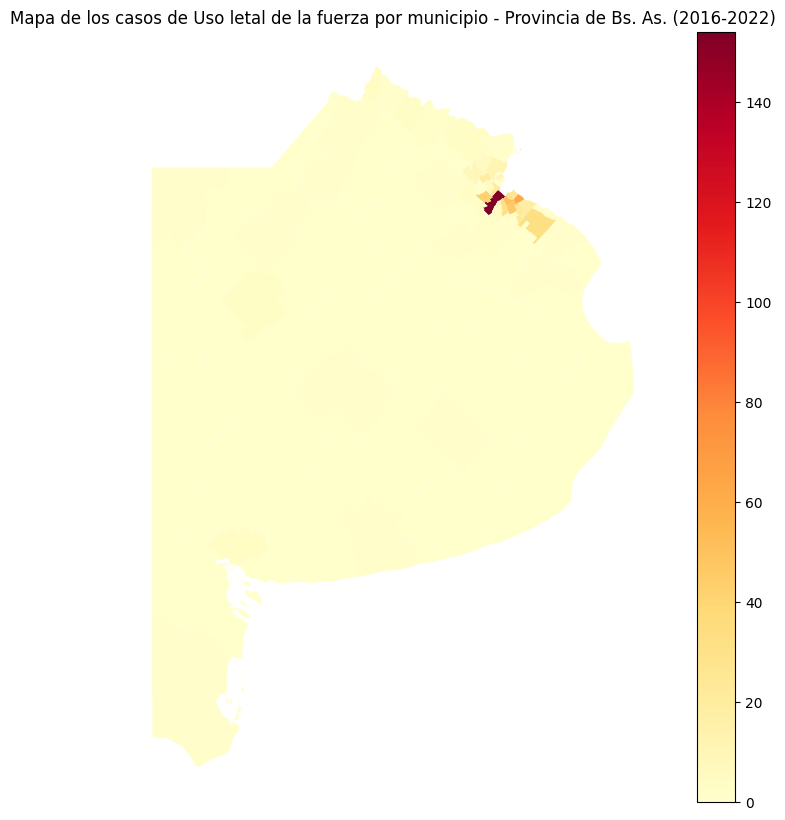

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_BA.plot(column = 'Casos_totales',
         legend = True,
         cmap='YlOrRd',
          ax = ax
        );
ax.set(title='Mapa de los casos de Uso letal de la fuerza por municipio - Provincia de Bs. As. (2016-2022)')

ax.set_axis_off()
plt.show()